In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150


In [3]:
data.shape

(1000, 9)

### Check Data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Mean

In [5]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Median

In [6]:
#numerical columns
num_col = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

median = data[num_col].median()

print("Median Of All Numeric Columns:\n",median)

Median Of All Numeric Columns:
 Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64


### Mode 

In [7]:
mode = data.mode().iloc[0]
mode

Transaction ID              1
Date                5/16/2023
Customer ID           CUST001
Gender                 Female
Age                      43.0
Product Category     Clothing
Quantity                  4.0
Price per Unit           50.0
Total Amount             50.0
Name: 0, dtype: object

### Check Null Values

In [8]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Time Series Analysis - Monthly Sales Trend

In [9]:
#Convert Date column datatype to dateime format
data['Date'] = pd.to_datetime(data['Date'])

#Set Date column to index
data.set_index('Date', inplace = True)

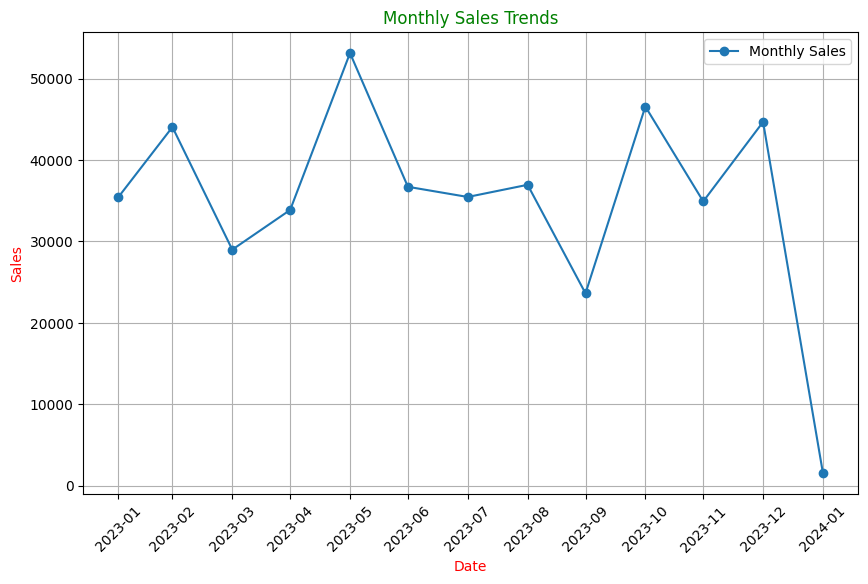

In [10]:
#Resampe data by month to analyze monthly trends
all_months = pd.date_range(start = "2023-01-01", end = "2024-01-31", freq='M')
mon_sale = data['Total Amount'].resample('M').sum().reindex(all_months, fill_value=0)

#Plotting
plt.figure(figsize=(10,6))
plt.plot(mon_sale, marker = 'o', label='Monthly Sales')
plt.title('Monthly Sales Trends', color='green')
plt.xlabel('Date', color='red')
plt.ylabel('Sales', color='red')

# Setting x-axis ticks to show each month
plt.xticks(pd.date_range(start='2023-01-01', end='2024-01-31', freq='M'), 
           labels=[date.strftime('%Y-%m') for date in pd.date_range(start='2023-01-01', end='2024-01-31', freq='M')],
           rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Time Series Analysis - Monthly Sales Wth 3 Month Average Trend

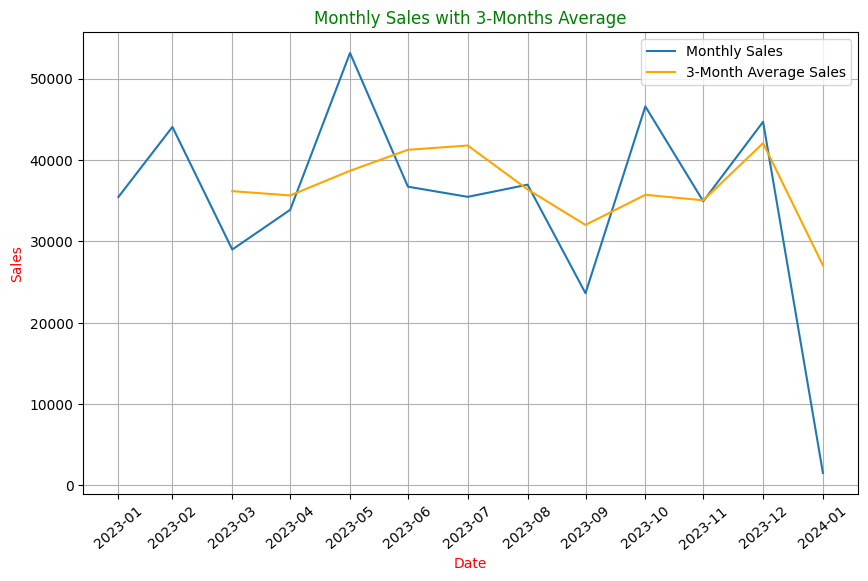

In [11]:
Three_month_avg = mon_sale.rolling(window=3).mean()

plt.figure(figsize=(10,6))
plt.plot(mon_sale, label='Monthly Sales')
plt.plot(Three_month_avg, label='3-Month Average Sales', color='orange')
plt.title('Monthly Sales with 3-Months Average', color='green')
plt.xlabel('Date', color='red')
plt.ylabel('Sales', color='red')

# Setting x-axis ticks to show each month
plt.xticks(pd.date_range(start='2023-01-01', end='2024-01-31', freq='M'), 
           labels=[date.strftime('%Y-%m') for date in pd.date_range(start='2023-01-01', end='2024-01-31', freq='M')],
           rotation=40)
plt.legend()
plt.grid(True)
plt.show()

### Customer & Product Analysis

#### Customer Analaysis

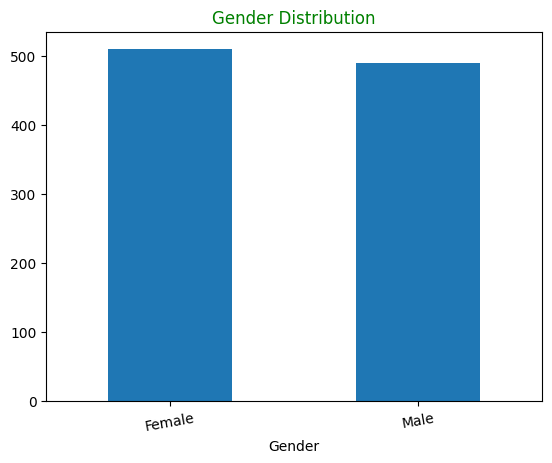

In [12]:
gender_dist = data['Gender'].value_counts()
gender_dist.plot(kind='bar')
plt.title('Gender Distribution', color='green')
plt.xticks(rotation=10)
plt.show()

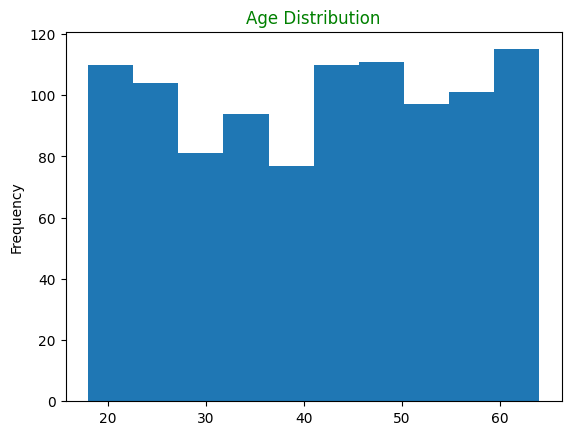

In [13]:
data['Age'].plot(kind='hist')
plt.title('Age Distribution', color='green')
plt.show()

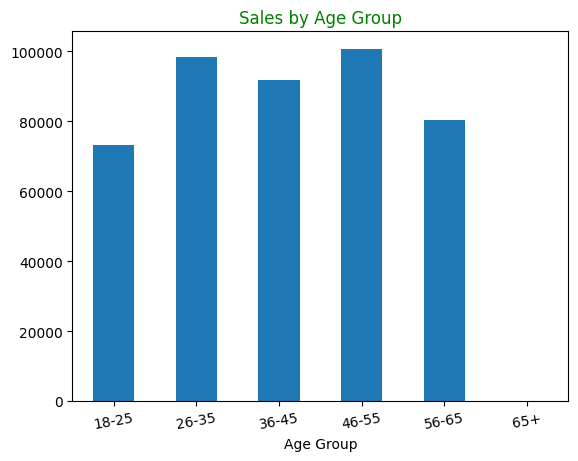

In [14]:
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_sales = data.groupby('Age Group')['Total Amount'].sum()
age_sales.plot(kind='bar')
plt.title('Sales by Age Group', color='green')
plt.xticks(rotation=10)
plt.show()

#### Product Analysis

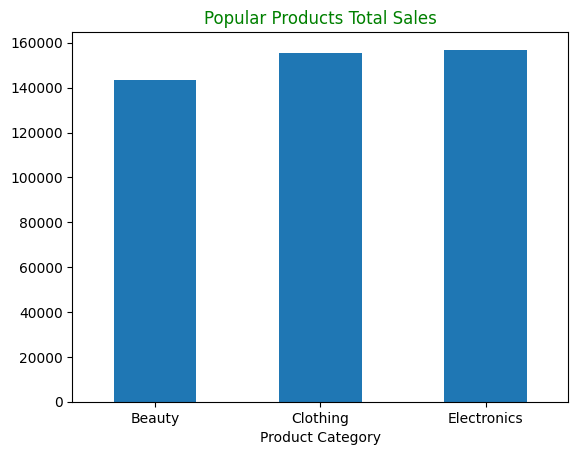

In [15]:
pop_product = data.groupby('Product Category')['Total Amount'].sum()
pop_product.plot(kind='bar')
plt.title('Popular Products Total Sales', color='green')
plt.xticks(rotation=0)
plt.show()

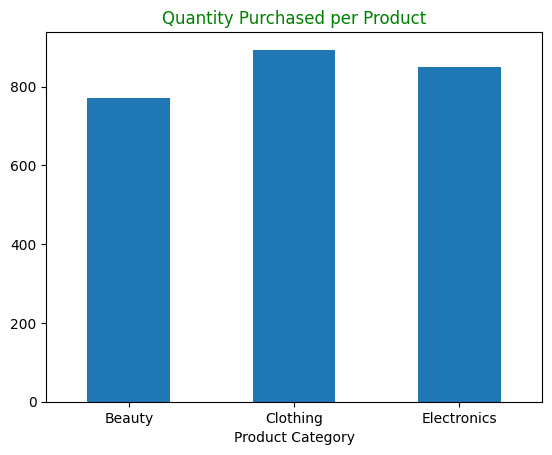

In [16]:
quan_per_prod = data.groupby('Product Category')['Quantity'].sum()
quan_per_prod.plot(kind='bar')
plt.title('Quantity Purchased per Product', color='green')
plt.xticks(rotation=0)
plt.show()

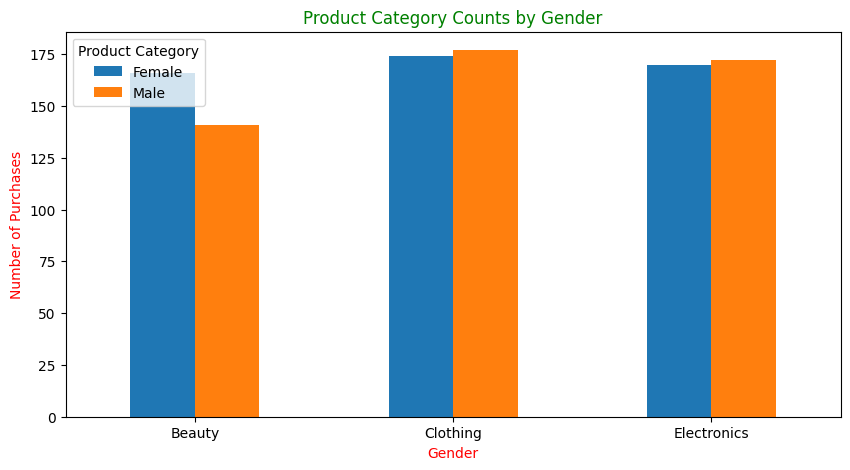

In [17]:
gender_per_prod = data.groupby(['Product Category','Gender']).size().unstack()
gender_per_prod
gender_per_prod.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=0)
plt.title('Product Category Counts by Gender', color='green')
plt.xlabel("Gender", color='red')
plt.ylabel("Number of Purchases", color='red')
plt.legend(title="Product Category")
plt.show()

### Heatmap

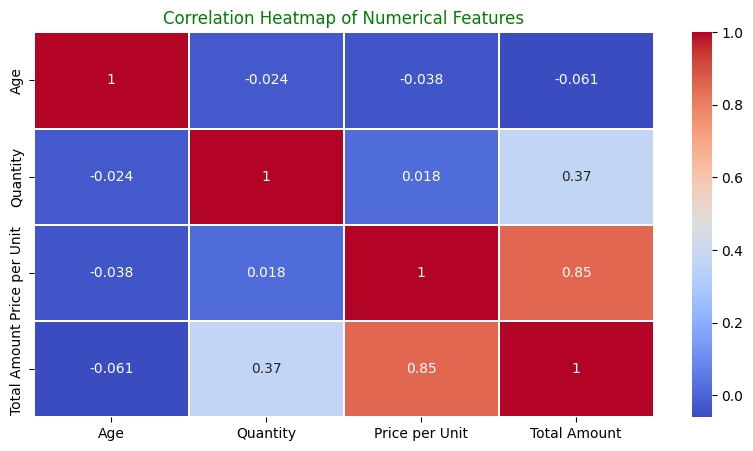

In [18]:
numerical_data = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

corr = numerical_data.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title("Correlation Heatmap of Numerical Features", color='green')
plt.show()

# **Recommendations Based on EDA Findings:**

# ***Inventory Management:***
* Stock up on popular items based on seasonal trends identified in sales by month.
* Optimize quantities based on average and maximum sales volume in each category.

# ***Customer Segmentation:***
* Target specific age groups with tailored promotions, as the age distribution is centered around 41 with a wide range up to 64.
* Develop gender-specific marketing for categories where purchasing trends differ.

# ***Pricing Strategy:***
* Consider pricing adjustments for items with high variance in "price per unit" to improve profitability.
* Offer bundles or discounts on items with lower average "total amount" to increase sales volume.

# ***Sales Forecasting:***
* Implement a forecasting model based on identified seasonal patterns to better manage inventory and meet demand during peak times.

# ***Promotion and Marketing:***
* Schedule marketing campaigns during periods of higher purchase frequency.
* Run special offers on low-turnover items to reduce excess stock while attracting repeat customers.